# Code for reproducing figures
Jupyter notebook accompanying "Predictive coding is a consequence of energy efficiency in recurrent neural networks".
This notebook produces the main figures in the paper and gives a simple example of how you can train this model.

In [109]:
%load_ext autoreload
%autoreload 2
# %matplotlib notebook
%matplotlib inline

import torch
import torchvision
import torch.nn.functional as F
import numpy as np
import pandas as pd
from typing import Tuple, List, Callable, Optional
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from functions import *

if torch.cuda.is_available():
    DEVICE = 'cuda'
    torch.set_default_tensor_type(torch.cuda.FloatTensor)
else:
    DEVICE = 'cpu'

print('Using {}'.format(DEVICE))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using cpu


Constants

In [110]:
INPUT_SIZE = 28*28 
BATCH_SIZE = 32
SEQ_LENGTH = 10
LOSS_FN = L1Loss

Local imports

In [111]:
import mnist
import plot
import Network
from train import train

Load MNIST dataset

In [112]:
training_set, validation_set, test_set = mnist.load(val_ratio=0.0)

Create a network definition for a single model for e.g. digit visualisation

In [113]:
digit_net = Network.State(activation_func=torch.nn.ReLU(),
            optimizer=torch.optim.Adam,
            lr=1e-4,
            input_size=INPUT_SIZE,
            hidden_size=INPUT_SIZE,
            title="networks/digit_net",
            device=DEVICE)

The following code can, if uncommented, be used to train the models:

In [116]:
# train(digit_net,
#       train_ds=training_set,
#       test_ds=test_set,
#       loss_fn=LOSS_FN,
#       num_epochs=200,
#       batch_size=BATCH_SIZE,
#       sequence_length=SEQ_LENGTH,
#       verbose=False)

However, a pre-trained model is available and you can load that in. This network is used to produce figure 3, figure 4 ,figure 5A and the figures in appendix A in the paper.

In [117]:
digit_net.load()

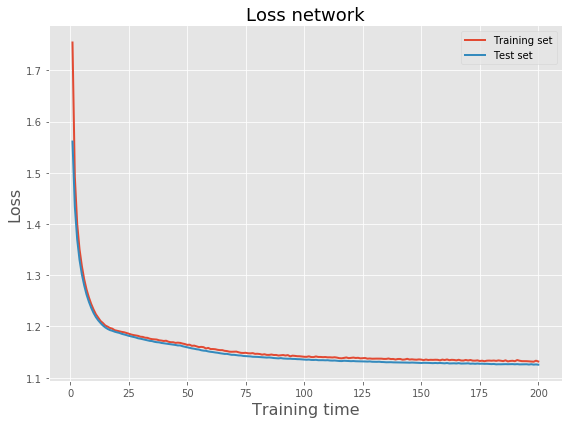

In [118]:
plot.training_progress(net, save=False)

Here, we retrieve the 10 model instances used to produce preactivation results in figure 2 and 5B in the figure. Note that we pass 'i' to load to make sure the correct instance of 'preact_net' is loaded

In [119]:
preact_net_list = []
n_instances = 10
for i in range(0, n_instances):
    preact_net = Network.State(activation_func=torch.nn.ReLU(),
            optimizer=torch.optim.Adam,
            lr=1e-4,
            input_size=INPUT_SIZE,
            hidden_size=INPUT_SIZE,
            title="networks/preact_net",
            device=DEVICE)
    preact_net.load(i)
    preact_net_list.append(net)

Computes the preactivations of the networks and respective preactivation bounds (input, data median and category median) (fig 2 and fig 5B in the paper)

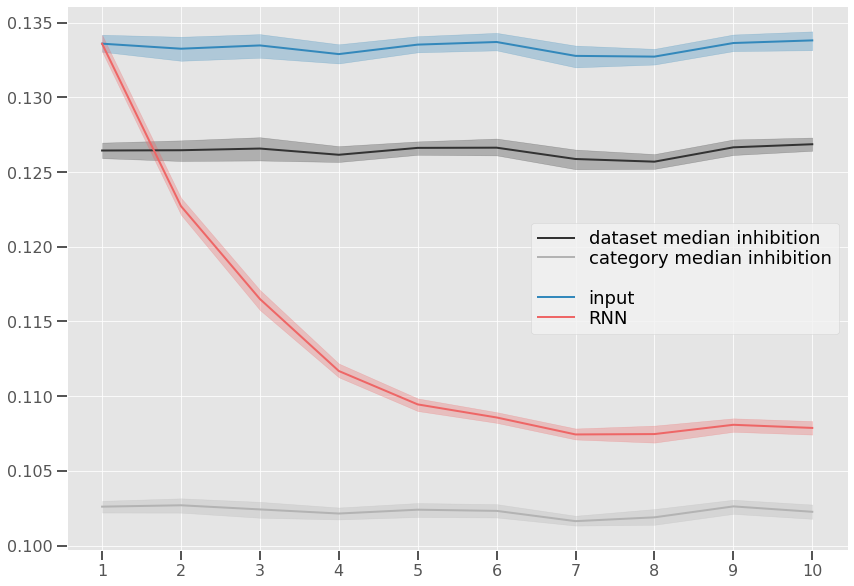

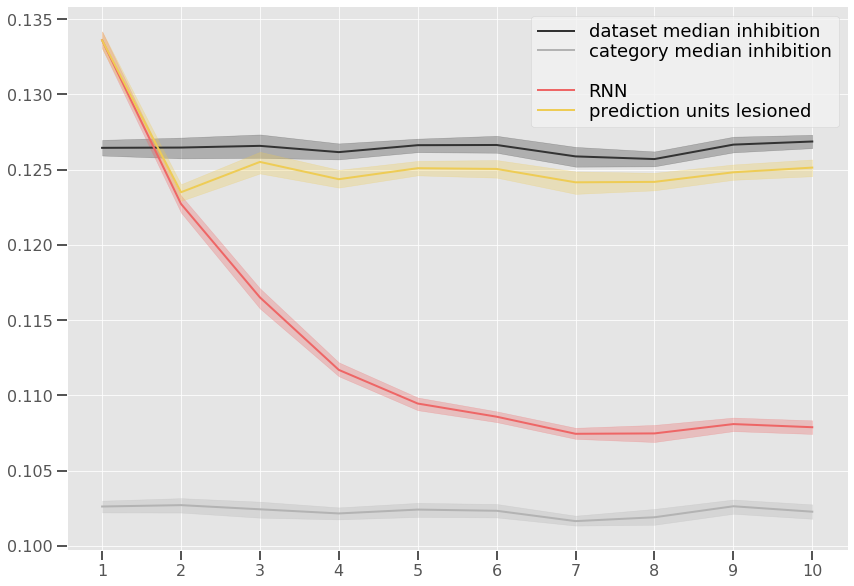

In [120]:
plot.bootstrap_model_activity(preact_net_list, training_set, test_set, seed=None, save=True)

Produces figure 3 in the paper

<Figure size 216x216 with 0 Axes>

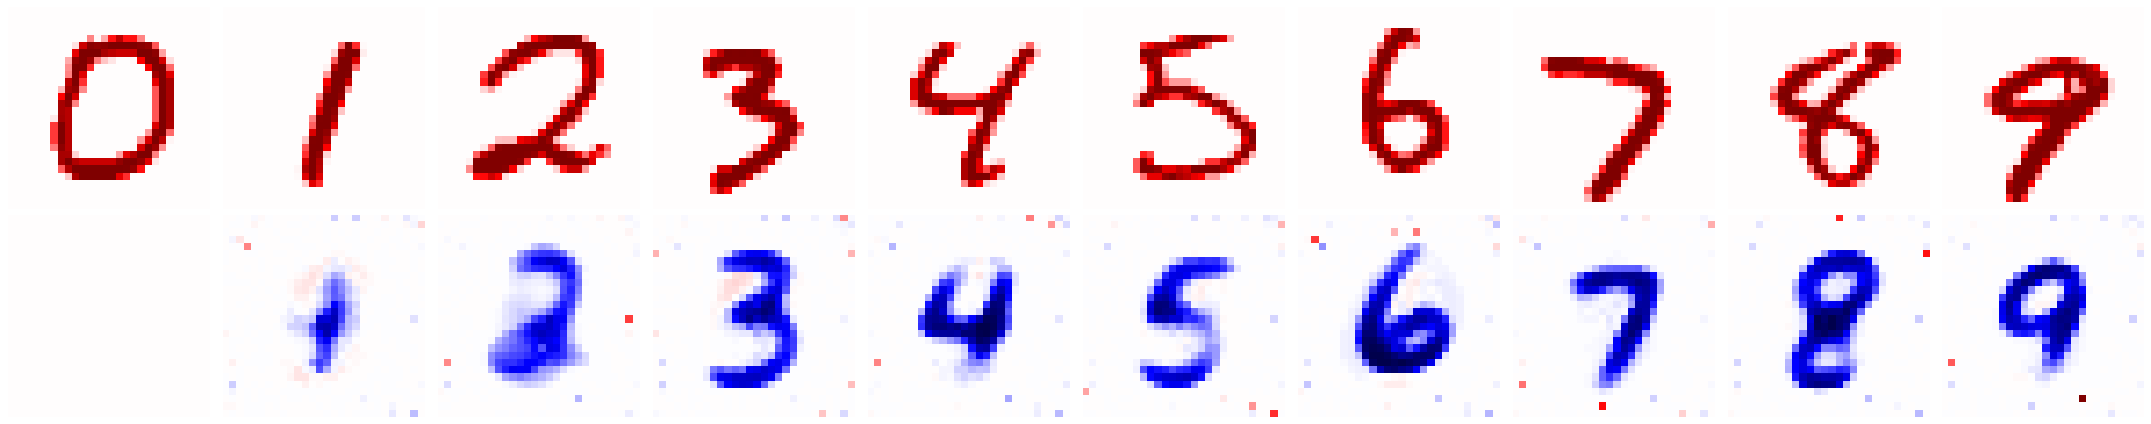

In [121]:
plot.example_sequence_state(digit_net, test_set, save=True)

Figure 4

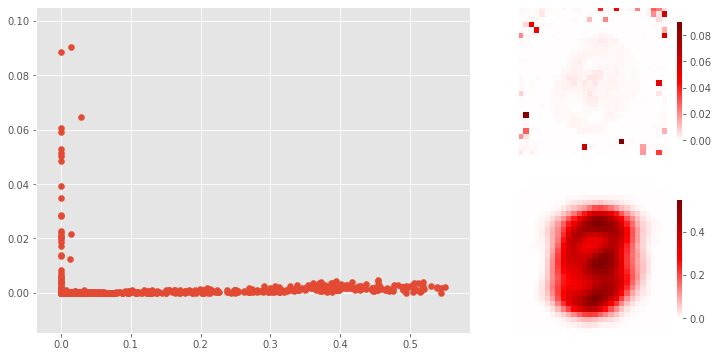

In [122]:
plot.xdrive_pdrive(digit_net, test_set, save=True)

Produces figures in Appendix A of paper: shows the internal drive of the network over depending on the number inputs prior to the network, e.g. at the third time step the network has seen three presentations of a digit. 

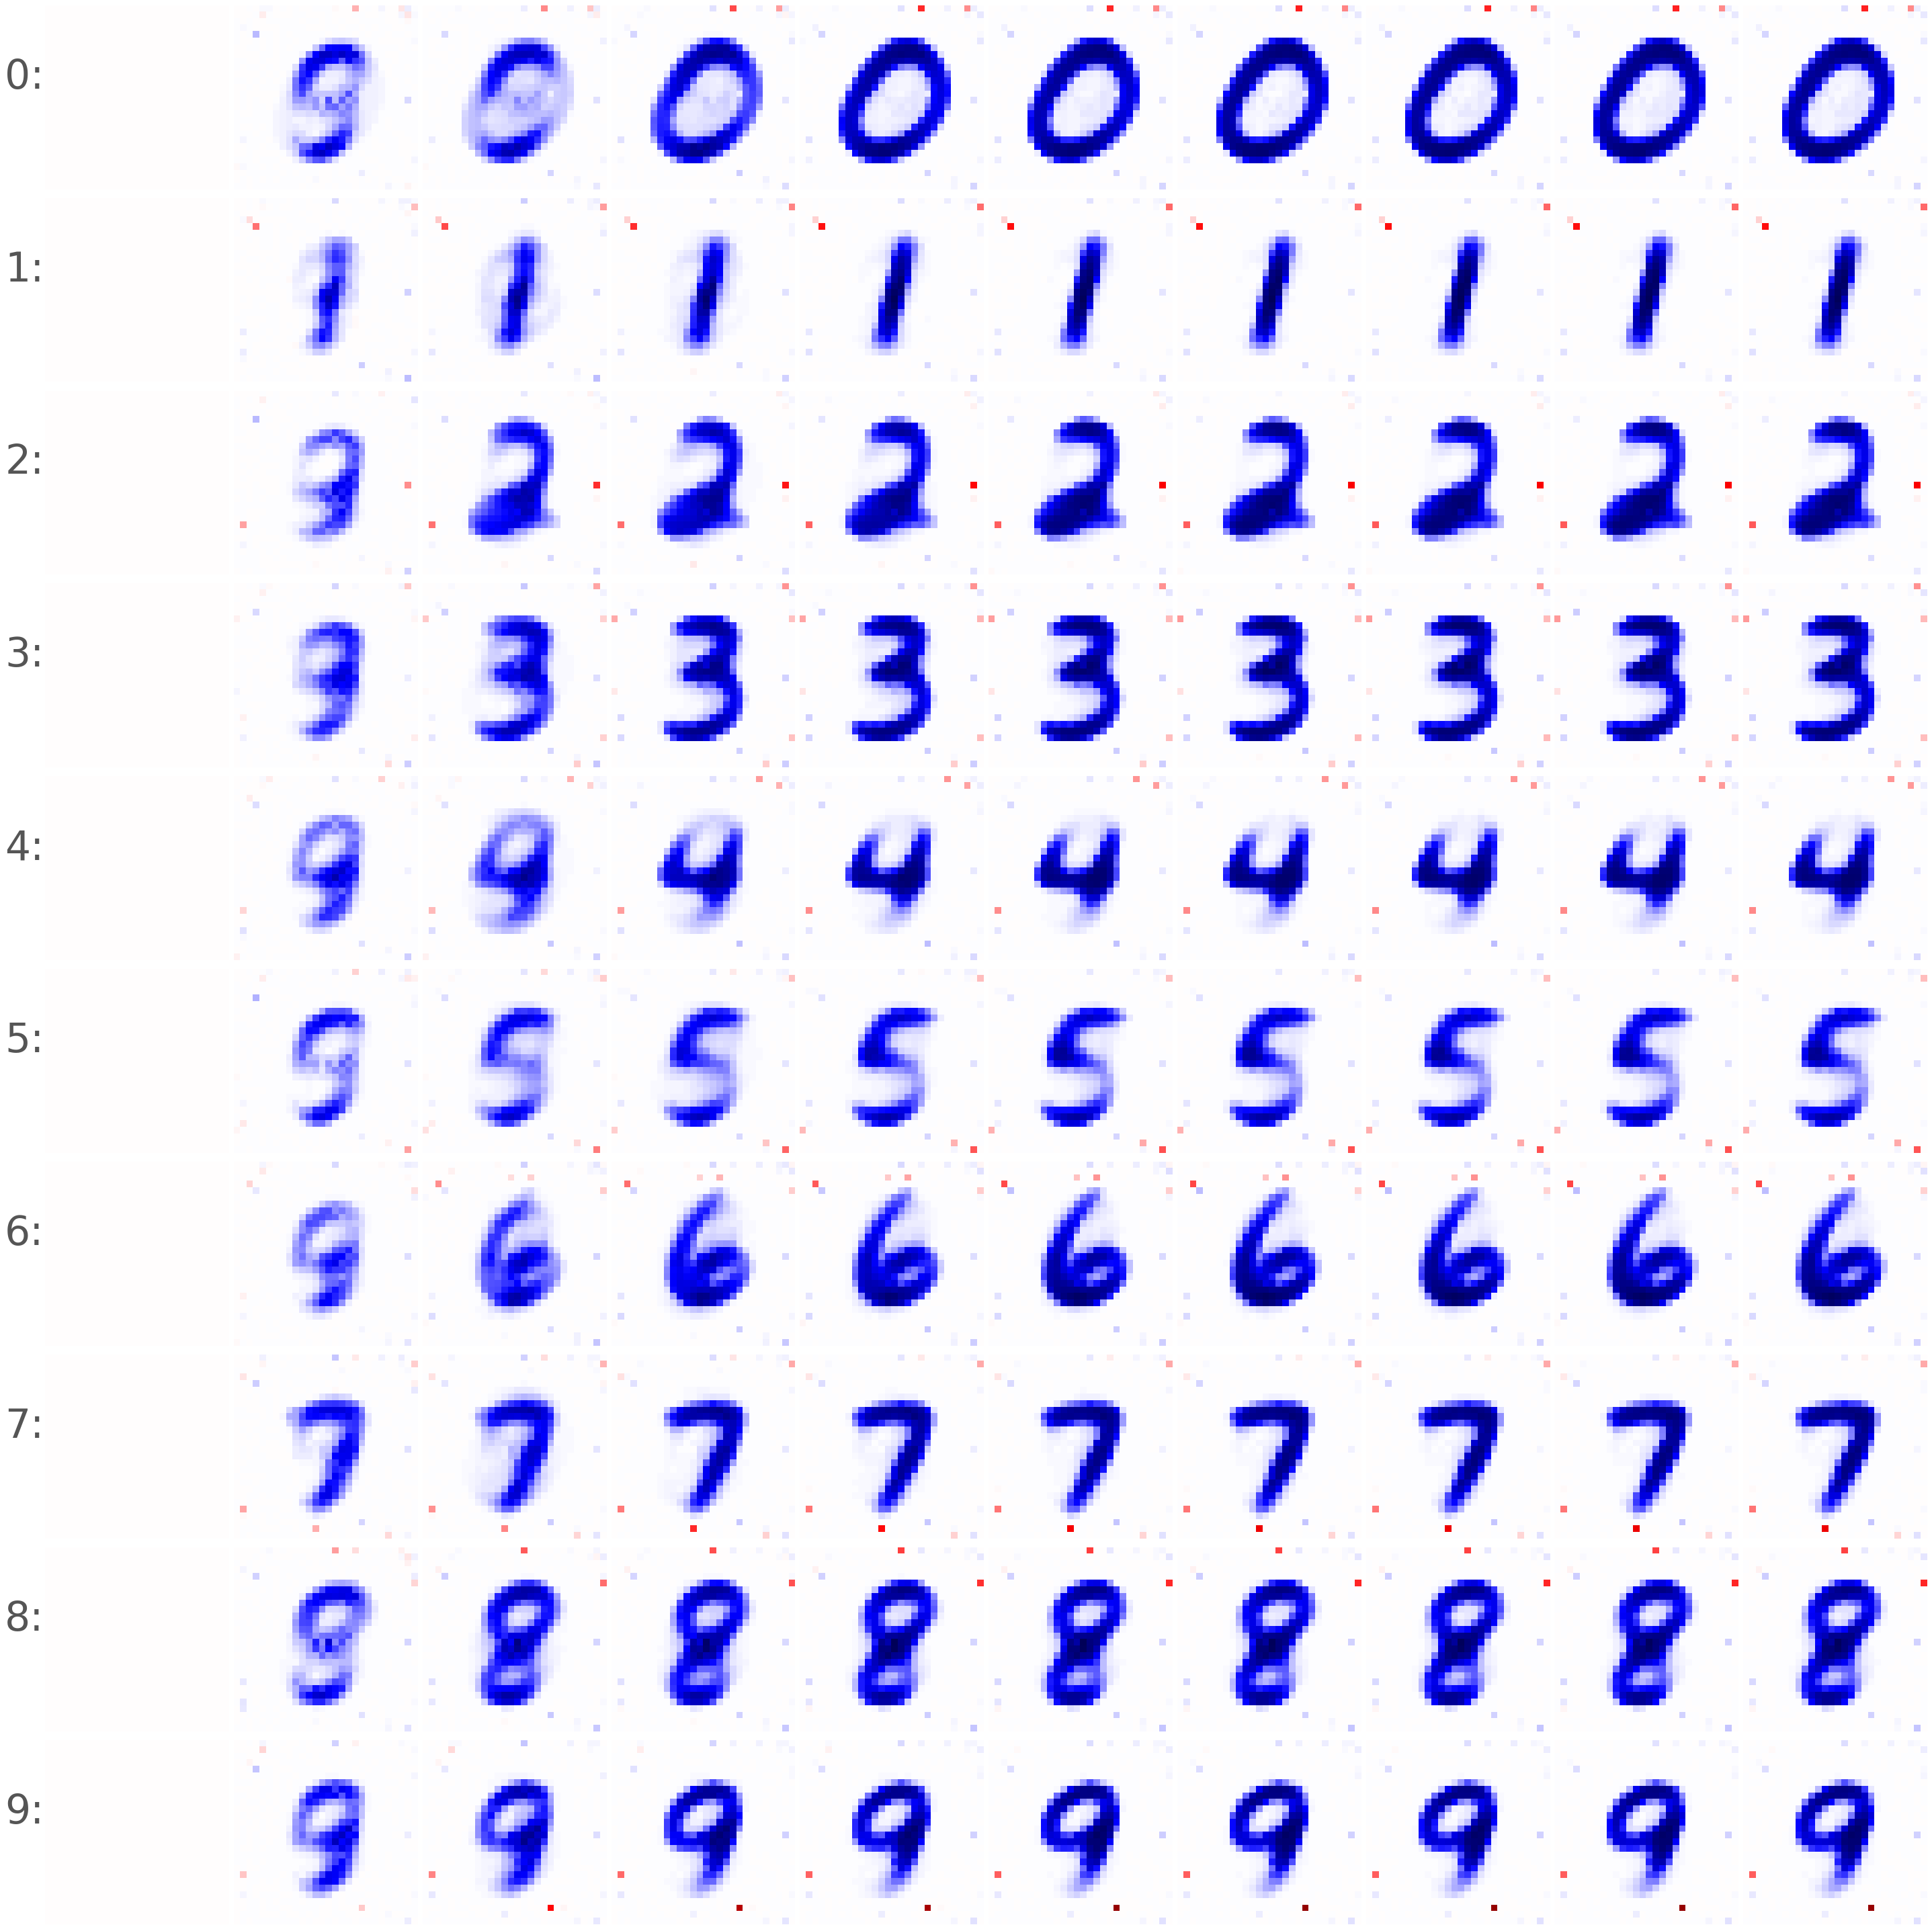

In [123]:
plot.pred_after_timestep(digit_net, test_set, mask=None, save=True)

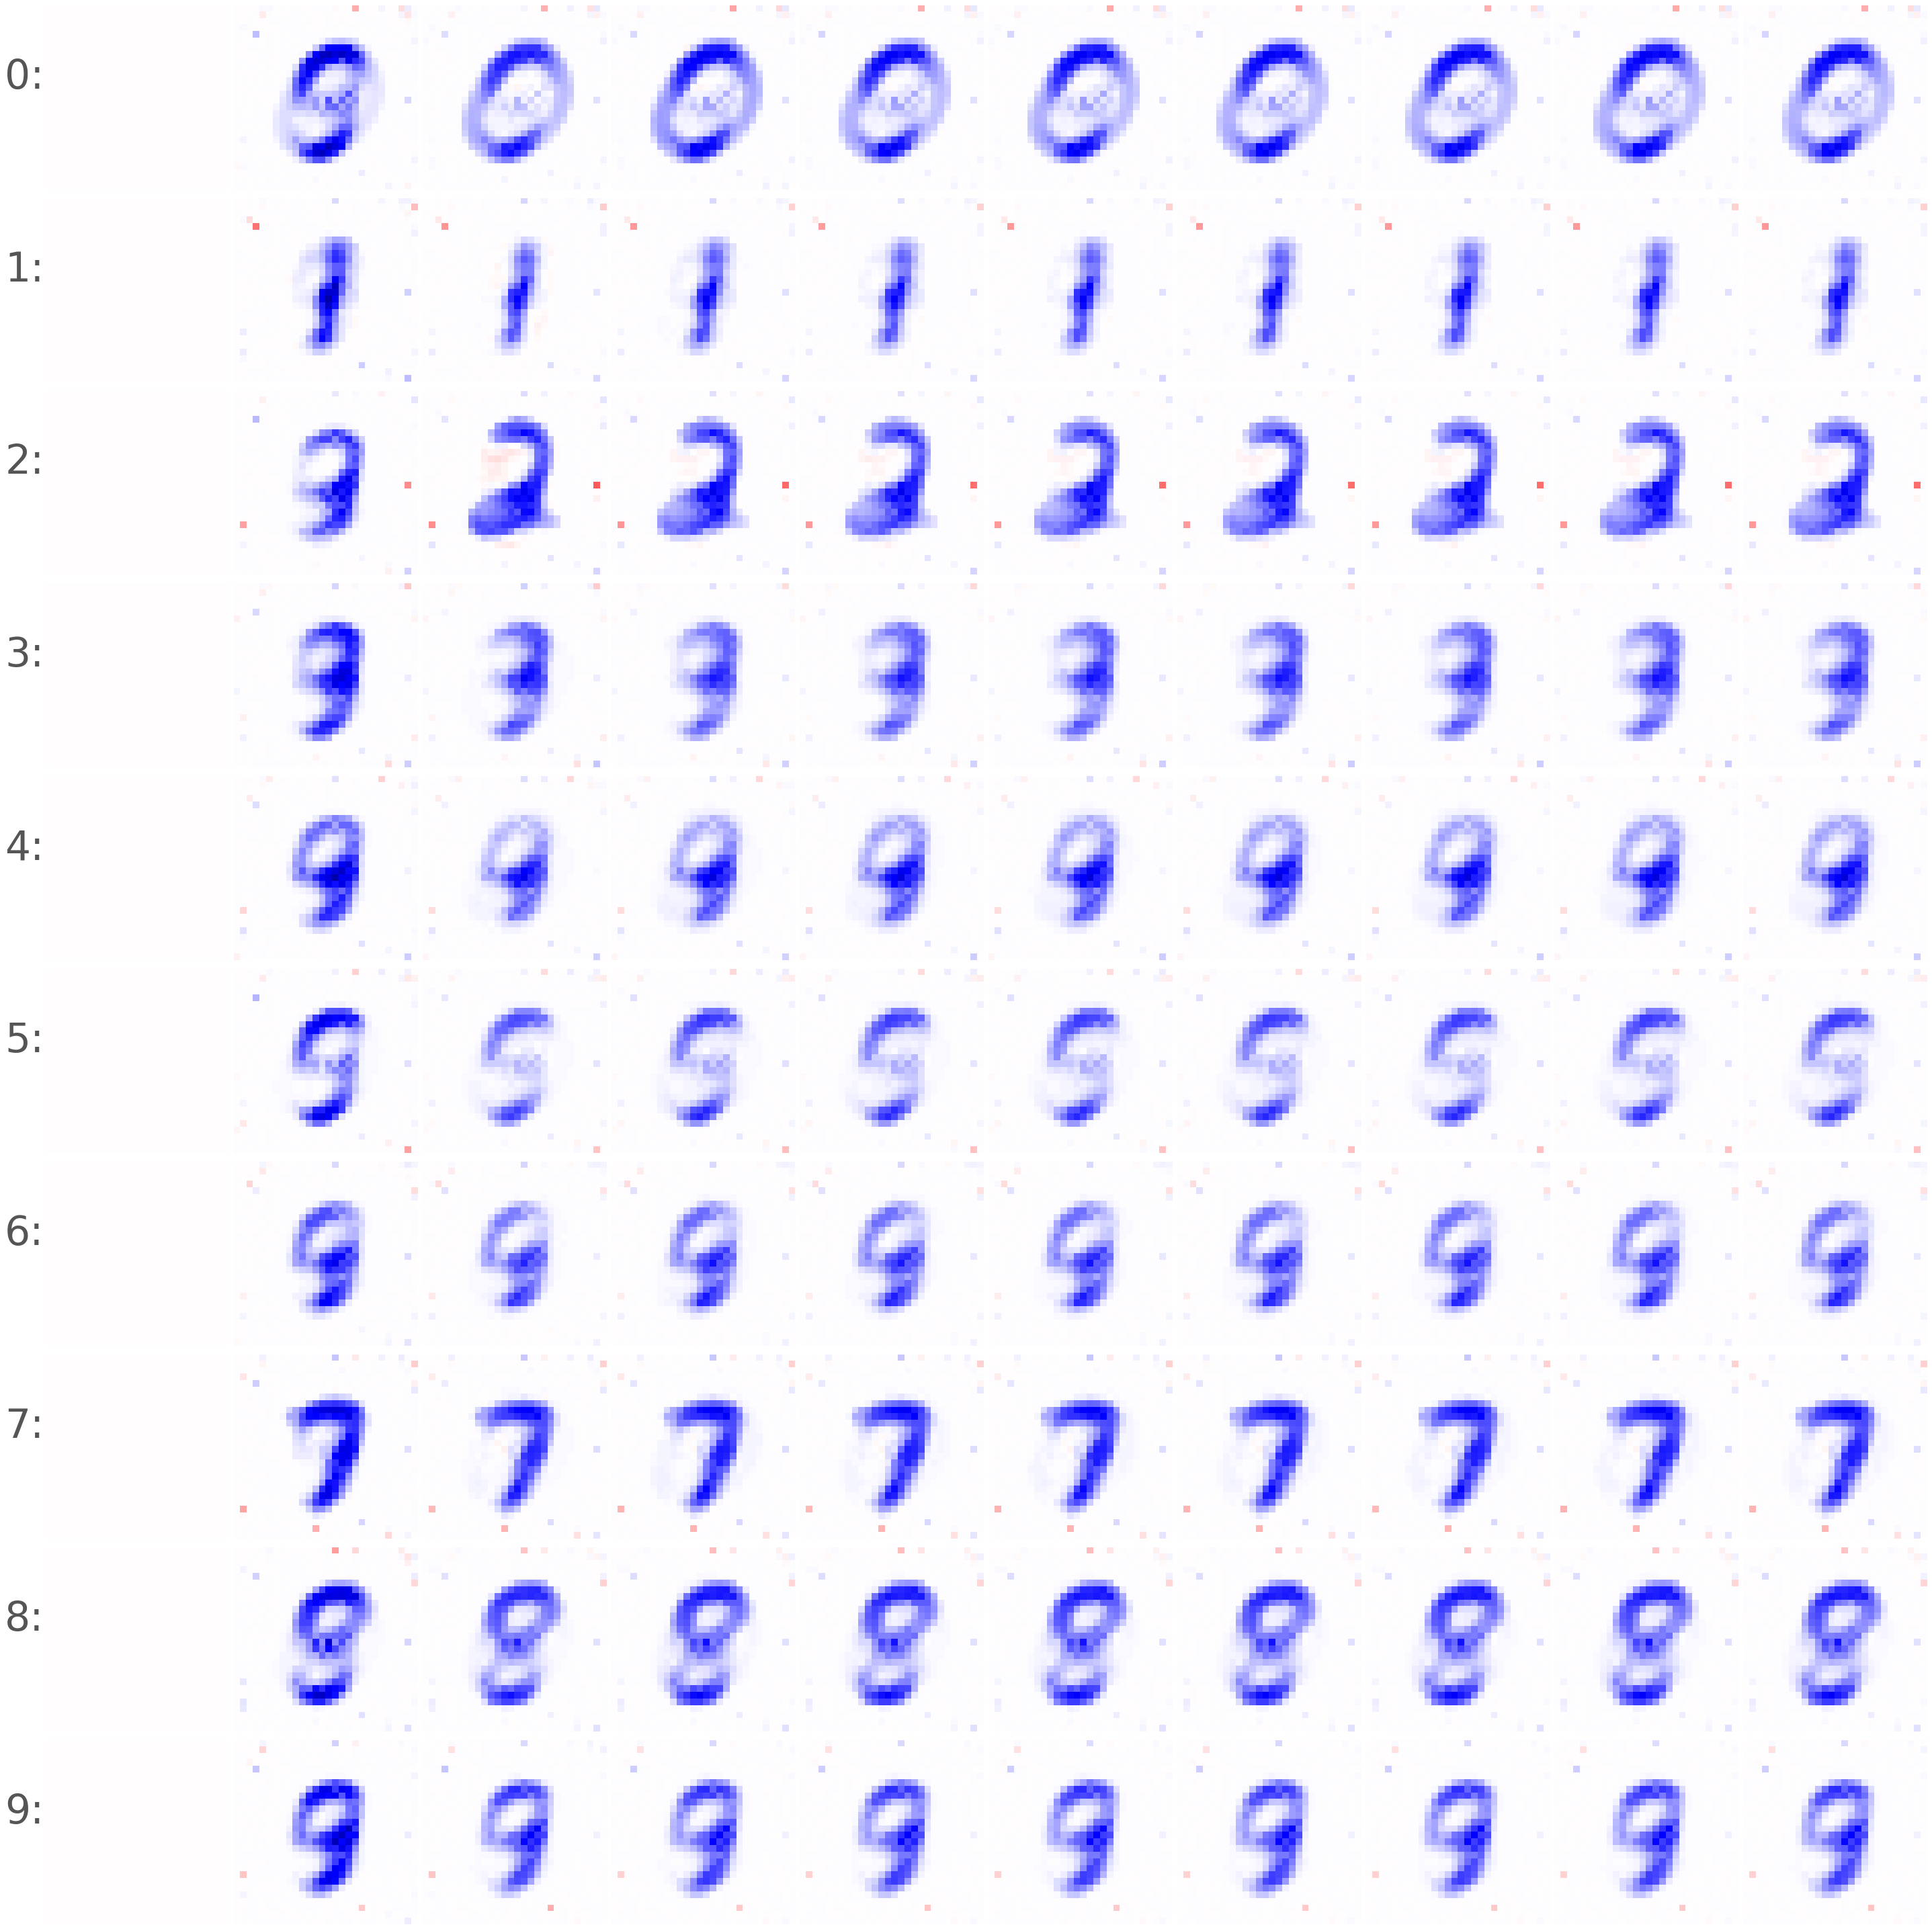

In [124]:
plot.pred_after_timestep(digit_net, test_set, mask=plot._pred_mask(net, test_set), save=True)